
# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.
Observations and Insights

Scatter plots were generated to showcase relationships among:
    Temperature (F) vs. Latitude
    Humidity (%) vs. Latitude
    Cloudiness (%) vs. Latitude
    Wind Speed (mph) vs. Latitude

I ran linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

Of the four, only Latitude vs. Temperature had any moderate to strong correlations. Temperature noticibly increased the closer we came towards the equator (latitude = 0), and peaked at a latitude of 20o, as compared to the equator i.e. 0. This could be due to limited sample size. However, no other correlations were observed.

In [61]:
import pandas as pd

import matplotlib.pyplot as plt
import requests
from citipy import citipy 
from api_keys import weather_api_key, g_key
import time
from pprint import pprint
from random import uniform
import numpy as np

## Generate Cities List

In [62]:
cities=[]

In [34]:
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
count=0
while(count<=1500):
    long = round(uniform(-180,180), 3) #longitude ranges from -180 to 180, as shown in given figure
    lat = round(uniform(-90, 90), 3) #latitude ranges likewise
    #feed into citipy the lat, long coordinates to return as city object
    city = citipy.nearest_city(lat, long)
    city_name = city.city_name
    country_code = city.country_code
    city_entry = f"{city_name},{country_code}"
    if city_entry not in cities:
        cities.append(city_entry)
        print(f"city generated: {city_entry}")

        
    count+=1

city generated: bahir dar,et
city generated: atar,mr
city generated: xinyu,cn
city generated: tuy hoa,vn
city generated: antofagasta,cl
city generated: pemangkat,id
city generated: kondinskoye,ru
city generated: wajima,jp
city generated: gamba,ga
city generated: pokosnoye,ru
city generated: ahar,ir
city generated: hai phong,vn
city generated: eyl,so
city generated: akdepe,tm
city generated: amderma,ru
city generated: kisangani,cd
city generated: henties bay,na
city generated: victor harbor,au
city generated: dakar,sn
city generated: luganville,vu
city generated: jamestown,us
city generated: bocaranga,cf
city generated: cap malheureux,mu
city generated: ocean city,us
city generated: zhitikara,kz
city generated: gat,ly
city generated: coffs harbour,au
city generated: okha,ru
city generated: uzhur-4,ru
city generated: maxixe,mz
city generated: frankfort,za
city generated: yar-sale,ru
city generated: doka,sd
city generated: csabrendek,hu
city generated: razdolnoye,ru
city generated: koga,j

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
len(cities)

868

In [13]:
print(len(lng),len(lat),len(mt),len(cl),len(ws),len(cntry),len(dte),len(h))

404 404 404 404 404 404 404 404


In [36]:


baseUrl="http://api.openweathermap.org/data/2.5/weather?"

lng,lat,mt,cl,ws,cntry,dte,h,city1=([] for i in range(9))
for i,city in enumerate(cities):
    #params={"appid":weather_api_key,
    #        "q":city}
    url=baseUrl + "appid=" + weather_api_key + "&q=" + city+"&units=" +"Imperial"
    
    #time.sleep(2)
    if len(h)==500:
        break
    try:
        response=requests.get(url).json()
        pprint(response)
        city1.append(response["name"])
        lng.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        mt.append(response["main"]["temp"])
        h.append(response["main"]["humidity"])
        cl.append(response["clouds"]["all"])
        ws.append(response["wind"]["speed"])
        cntry.append(response["sys"]["country"])
        dte.append(response["dt"])
        print(f"Processing Record {i} for City: {city}")
        
    except:
        print("City not found. Skipping...")

http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=rikitea,pf&units=Imperial
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -23.1203, 'lon': -134.9692},
 'dt': 1631761950,
 'id': 4030556,
 'main': {'feels_like': 74.21,
          'grnd_level': 1017,
          'humidity': 67,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 73.96,
          'temp_max': 73.96,
          'temp_min': 73.96},
 'name': 'Rikitea',
 'sys': {'country': 'PF', 'sunrise': 1631717774, 'sunset': 1631760832},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 70, 'gust': 14.97, 'speed': 13.73}}
Processing Record 0 for City: rikitea,pf
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=port alfred,za&units=Imperial
{'base': 'stations',
 'clouds': {'all': 57}

{'base': 'stations',
 'clouds': {'all': 43},
 'cod': 200,
 'coord': {'lat': -9.6567, 'lon': 120.2641},
 'dt': 1631761965,
 'id': 1622318,
 'main': {'feels_like': 93.63,
          'grnd_level': 1007,
          'humidity': 56,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 88.12,
          'temp_max': 88.12,
          'temp_min': 88.12},
 'name': 'Waingapu',
 'sys': {'country': 'ID', 'sunrise': 1631742748, 'sunset': 1631786133},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 75, 'gust': 15.19, 'speed': 12.71}}
Processing Record 12 for City: waingapu,id
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=kasongo-lunda,cd&units=Imperial
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -6.4667, 'lon': 16.8167},
 'dt': 1631761965,
 'id': 2315026,
 'main': 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -42.8794, 'lon': 147.3294},
 'dt': 1631761809,
 'id': 2163355,
 'main': {'feels_like': 54.9,
          'humidity': 57,
          'pressure': 1020,
          'temp': 56.84,
          'temp_max': 59.11,
          'temp_min': 55.26},
 'name': 'Hobart',
 'sys': {'country': 'AU',
         'id': 2002195,
         'sunrise': 1631736682,
         'sunset': 1631779211,
         'type': 2},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 113, 'gust': 3, 'speed': 1.99}}
Processing Record 22 for City: hobart,au
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=ushuaia,ar&units=Imperial
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -54.8, 'lon': -68.3},
 'dt': 1631761979,
 'id': 3833367,
 'main': {'feels_like': 15.46,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.7333, 'lon': 135.8667},
 'dt': 1631761995,
 'id': 2063036,
 'main': {'feels_like': 64.58,
          'grnd_level': 1011,
          'humidity': 57,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 65.64,
          'temp_max': 65.64,
          'temp_min': 65.64},
 'name': 'Port Lincoln',
 'sys': {'country': 'AU', 'sunrise': 1631739305, 'sunset': 1631782088},
 'timezone': 34200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 55, 'gust': 25.5, 'speed': 18.23}}
Processing Record 32 for City: port lincoln,au
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=qaanaaq,gl&units=Imperial
{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': 77.484, 'lon': -69.3632},
 'dt': 1631761996,
 'id': 3831208,
 'main': {'feels

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 50.6789, 'lon': 156.125},
 'dt': 1631762010,
 'id': 2121385,
 'main': {'feels_like': 51.87,
          'grnd_level': 1018,
          'humidity': 73,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 53.4,
          'temp_max': 53.4,
          'temp_min': 53.4},
 'name': "Severo-Kuril'sk",
 'sys': {'country': 'RU', 'sunrise': 1631733119, 'sunset': 1631778553},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 287, 'gust': 12.5, 'speed': 10.4}}
Processing Record 44 for City: severo-kurilsk,ru
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=clyde river,ca&units=Imperial
{'base': 'stations',
 'clouds': {'all': 23},
 'cod': 200,
 'coord': {'lat': 70.4692, 'lon': -68.5914},
 'dt': 1631762012,
 'id': 5924351,
 'main': {'

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 5.8933, 'lon': 95.3214},
 'dt': 1631762023,
 'id': 1214026,
 'main': {'feels_like': 86.45,
          'grnd_level': 1009,
          'humidity': 70,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 82,
          'temp_max': 82,
          'temp_min': 82},
 'name': 'Sabang',
 'sys': {'country': 'ID', 'sunrise': 1631748558, 'sunset': 1631792292},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 222, 'gust': 6.15, 'speed': 5.41}}
Processing Record 55 for City: sabang,id
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=arkadak,ru&units=Imperial
{'base': 'stations',
 'clouds': {'all': 3},
 'cod': 200,
 'coord': {'lat': 51.9326, 'lon': 43.4978},
 'dt': 1631762023,
 'id': 581080,
 'main': {'feels_like': 38.35,
  

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.6667, 'lon': -54.9167},
 'dt': 1631762034,
 'id': 3441890,
 'main': {'feels_like': 46.45,
          'grnd_level': 1015,
          'humidity': 74,
          'pressure': 1024,
          'sea_level': 1024,
          'temp': 49.39,
          'temp_max': 53.22,
          'temp_min': 49.39},
 'name': 'Departamento de Maldonado',
 'sys': {'country': 'UY',
         'id': 8712,
         'sunrise': 1631785047,
         'sunset': 1631827899,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 319, 'gust': 14.58, 'speed': 6.98}}
Processing Record 66 for City: maldonado,uy
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=minbu,mm&units=Imperial
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 20.1833,

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=busselton,au&units=Imperial
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -33.65, 'lon': 115.3333},
 'dt': 1631762048,
 'id': 2075265,
 'main': {'feels_like': 50.52,
          'grnd_level': 1010,
          'humidity': 76,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 52.05,
          'temp_max': 54.09,
          'temp_min': 52.05},
 'name': 'Busselton',
 'sys': {'country': 'AU',
         'id': 2020551,
         'sunrise': 1631744214,
         'sunset': 1631787033,
         'type': 2},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 229, 'gust': 32.23, 'speed': 22.93}}
Processing Record 78 for City: busselton,au
http://api.open

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 70.8578, 'lon': 29.0864},
 'dt': 1631762060,
 'id': 780687,
 'main': {'feels_like': 32.41,
          'grnd_level': 1024,
          'humidity': 75,
          'pressure': 1024,
          'sea_level': 1024,
          'temp': 37.4,
          'temp_max': 37.4,
          'temp_min': 37.4},
 'name': 'Berlevåg',
 'sys': {'country': 'NO',
         'id': 1633,
         'sunrise': 1631762300,
         'sunset': 1631810335,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 174, 'gust': 6.51, 'speed': 6.35}}
Processing Record 90 for City: berlevag,no
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=hovd,mn&units=Imperial
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 48.0056, 'lon': 91.6419},
 'd

{'base': 'stations',
 'clouds': {'all': 82},
 'cod': 200,
 'coord': {'lat': -7.3817, 'lon': 108.2082},
 'dt': 1631762070,
 'id': 1640902,
 'main': {'feels_like': 85.91,
          'grnd_level': 978,
          'humidity': 72,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 81.5,
          'temp_max': 81.5,
          'temp_min': 81.5},
 'name': 'Kawalu',
 'sys': {'country': 'ID', 'sunrise': 1631745615, 'sunset': 1631789051},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 96, 'gust': 4.14, 'speed': 3.04}}
Processing Record 101 for City: kawalu,id
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=ouadda,cf&units=Imperial
{'base': 'stations',
 'clouds': {'all': 61},
 'cod': 200,
 'coord': {'lat': 8.0777, 'lon': 22.4007},
 'dt': 1631762071,
 'id': 236901,
 'main': {'feels_like': 68.83,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -36.7167, 'lon': -73.1167},
 'dt': 1631762084,
 'id': 3870282,
 'main': {'feels_like': 44.67,
          'humidity': 87,
          'pressure': 1025,
          'temp': 47.88,
          'temp_max': 47.88,
          'temp_min': 47.88},
 'name': 'Talcahuano',
 'sys': {'country': 'CL',
         'id': 8499,
         'sunrise': 1631789437,
         'sunset': 1631832243,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 200, 'speed': 6.91}}
Processing Record 111 for City: talcahuano,cl
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=saint-philippe,re&units=Imperial
{'base': 'stations',
 'clouds': {'all': 17},
 'cod': 200,
 'coord': {'lat': -21.3585, 'lon': 55.7679},
 'dt': 1631762085,
 'id': 935215,
 'main': {'feels_like': 6

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 34.6182, 'lon': -79.0086},
 'dt': 1631762098,
 'id': 4477525,
 'main': {'feels_like': 76.6,
          'grnd_level': 1012,
          'humidity': 93,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 75.04,
          'temp_max': 77.45,
          'temp_min': 70.93},
 'name': 'Lumberton',
 'sys': {'country': 'US',
         'id': 4863,
         'sunrise': 1631703558,
         'sunset': 1631748194,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 163, 'gust': 14.43, 'speed': 5.64}}
Processing Record 122 for City: lumberton,us
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=tuatapere,nz&units=Imperial
{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': -46.1333, 'l

{'base': 'stations',
 'clouds': {'all': 79},
 'cod': 200,
 'coord': {'lat': 5.5836, 'lon': -0.1072},
 'dt': 1631762112,
 'id': 2294665,
 'main': {'feels_like': 77.58,
          'grnd_level': 1011,
          'humidity': 90,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 76.05,
          'temp_max': 76.05,
          'temp_min': 76.05},
 'name': 'Teshie',
 'sys': {'country': 'GH', 'sunrise': 1631771462, 'sunset': 1631815183},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 268, 'gust': 15.46, 'speed': 8.81}}
Processing Record 133 for City: teshie,gh
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=yerbogachen,ru&units=Imperial
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 61.2767, 'lon': 108.0108},
 'dt': 1631762114,
 'id': 2012956,
 'main': {'feels_like

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 56.1128, 'lon': 69.4902},
 'dt': 1631762127,
 'id': 1505453,
 'main': {'feels_like': 56.43,
          'grnd_level': 990,
          'humidity': 54,
          'pressure': 1000,
          'sea_level': 1000,
          'temp': 58.35,
          'temp_max': 58.35,
          'temp_min': 58.35},
 'name': 'Ishim',
 'sys': {'country': 'RU', 'sunrise': 1631753719, 'sunset': 1631799527},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 207, 'gust': 26.28, 'speed': 11.5}}
Processing Record 145 for City: ishim,ru
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=sitka,us&units=Imperial
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 57.0531, 'lon': -135.33},
 'dt': 1631762128,
 'id': 5557293,
 'main': {'feels_like': 

{'base': 'stations',
 'clouds': {'all': 51},
 'cod': 200,
 'coord': {'lat': 53.8, 'lon': -9.5167},
 'dt': 1631762139,
 'id': 2960970,
 'main': {'feels_like': 56.1,
          'grnd_level': 1013,
          'humidity': 99,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 56.14,
          'temp_max': 60.17,
          'temp_min': 55.56},
 'name': 'Westport',
 'sys': {'country': 'IE',
         'id': 2001263,
         'sunrise': 1631772802,
         'sunset': 1631818357,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 175, 'gust': 5.17, 'speed': 3.62}}
Processing Record 157 for City: westport,ie
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=la ronge,ca&units=Imperial
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 55.1001, 'lon': -105.2

{'base': 'stations',
 'clouds': {'all': 93},
 'cod': 200,
 'coord': {'lat': 60.5697, 'lon': 27.1979},
 'dt': 1631762153,
 'id': 659169,
 'main': {'feels_like': 38.5,
          'grnd_level': 1021,
          'humidity': 64,
          'pressure': 1022,
          'sea_level': 1022,
          'temp': 42.08,
          'temp_max': 42.08,
          'temp_min': 42.08},
 'name': 'Hamina',
 'sys': {'country': 'FI',
         'id': 1366,
         'sunrise': 1631763657,
         'sunset': 1631809884,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 6, 'gust': 7.4, 'speed': 5.59}}
Processing Record 169 for City: hamina,fi
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=roma,au&units=Imperial
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -26.5833, 'lon': 148.7833},
 'dt

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': -28.4825, 'lon': -48.7808},
 'dt': 1631762163,
 'id': 3459094,
 'main': {'feels_like': 56.61,
          'grnd_level': 1023,
          'humidity': 67,
          'pressure': 1026,
          'sea_level': 1026,
          'temp': 57.96,
          'temp_max': 57.96,
          'temp_min': 57.96},
 'name': 'Laguna',
 'sys': {'country': 'BR', 'sunrise': 1631783501, 'sunset': 1631826500},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 248, 'gust': 1.3, 'speed': 1.16}}
Processing Record 180 for City: laguna,br
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=yanchukan,ru&units=Imperial
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 18.8003, 'lon': 110.3967},
 'dt': 1631762178,
 'id': 1791779,
 'main': {'feels_like': 93.87,
          'grnd_level': 1010,
          'humidity': 69,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 85.68,
          'temp_max': 85.68,
          'temp_min': 85.68},
 'name': 'Wanning',
 'sys': {'country': 'CN', 'sunrise': 1631744778, 'sunset': 1631788838},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 209, 'gust': 6.73, 'speed': 6.06}}
Processing Record 191 for City: wanning,cn
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=provost,ca&units=Imperial
{'base': 'stations',
 'clouds': {'all': 70},
 'cod': 200,
 'coord': {'lat': 52.3501, 'lon': -110.2683},
 'dt': 1631762178,
 'id': 6113828,
 'main': {'feels

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 20.8947, 'lon': -156.47},
 'dt': 1631762185,
 'id': 5847411,
 'main': {'feels_like': 88.18,
          'humidity': 61,
          'pressure': 1014,
          'temp': 84.22,
          'temp_max': 84.22,
          'temp_min': 81.66},
 'name': 'Kahului',
 'sys': {'country': 'US',
         'id': 7879,
         'sunrise': 1631722393,
         'sunset': 1631766531,
         'type': 1},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 19.57}}
Processing Record 202 for City: kahului,us
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=korla,cn&units=Imperial
{'base': 'stations',
 'clouds': {'all': 65},
 'cod': 200,
 'coord': {'lat': 41.7597, 'lon': 86.1469},
 'dt': 1631762059,
 'id': 1529376,
 'main': {'feels_like': 75.31,
  

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=ngunguru,nz&units=Imperial
{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': -35.6167, 'lon': 174.5},
 'dt': 1631762196,
 'id': 2186111,
 'main': {'feels_like': 63.12,
          'grnd_level': 992,
          'humidity': 84,
          'pressure': 996,
          'sea_level': 996,
          'temp': 63.16,
          'temp_max': 63.16,
          'temp_min': 63.16},
 'name': 'Ngunguru',
 'sys': {'country': 'NZ',
         'id': 2012217,
         'sunrise': 1631730055,
         'sunset': 1631772799,
         'type': 2},
 'timezone': 43200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 340, 'gust': 27.16, 'speed': 15.52}}
Processing Record 214 for City: ngunguru,nz
http://api.openweathermap.org

{'base': 'stations',
 'clouds': {'all': 95},
 'cod': 200,
 'coord': {'lat': -20.2078, 'lon': 57.7625},
 'dt': 1631762210,
 'id': 1106643,
 'main': {'feels_like': 68.41,
          'grnd_level': 1015,
          'humidity': 81,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 68.09,
          'temp_max': 69.91,
          'temp_min': 68.09},
 'name': 'Quatre Cocos',
 'sys': {'country': 'MU',
         'id': 2002134,
         'sunrise': 1631757857,
         'sunset': 1631801017,
         'type': 2},
 'timezone': 14400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 107, 'gust': 11.12, 'speed': 7.2}}
Processing Record 224 for City: quatre cocos,mu
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=fortuna,us&units=Imperial
{'base': 'stations',
 'clouds': {'all': 10},
 'cod': 200,
 'coord': {'lat': 40.5982

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 16.6362, 'lon': 1.637},
 'dt': 1631762221,
 'id': 2457161,
 'main': {'feels_like': 87.91,
          'grnd_level': 968,
          'humidity': 45,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 86.99,
          'temp_max': 86.99,
          'temp_min': 86.99},
 'name': 'Gao',
 'sys': {'country': 'ML', 'sunrise': 1631770911, 'sunset': 1631814896},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 203, 'gust': 19.57, 'speed': 10.09}}
Processing Record 235 for City: gao,ml
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=namatanai,pg&units=Imperial
{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': -3.6667, 'lon': 152.4333},
 'dt': 1631762223,
 'id': 2090021,
 'main': {'feels_like': 90.1

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=sambava,mg&units=Imperial
{'base': 'stations',
 'clouds': {'all': 66},
 'cod': 200,
 'coord': {'lat': -14.2667, 'lon': 50.1667},
 'dt': 1631762234,
 'id': 1056899,
 'main': {'feels_like': 69.22,
          'grnd_level': 1016,
          'humidity': 86,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 68.61,
          'temp_max': 68.61,
          'temp_min': 68.61},
 'name': 'Sambava',
 'rain': {'1h': 0.12},
 'sys': {'country': 'MG', 'sunrise': 1631759614, 'sunset': 1631802905},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 199, 'gust': 13.58, 'speed': 9.04}}
Processing Record 246 for City: sambava,mg
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf1

{'base': 'stations',
 'clouds': {'all': 33},
 'cod': 200,
 'coord': {'lat': -7.9139, 'lon': 39.6668},
 'dt': 1631762246,
 'id': 157429,
 'main': {'feels_like': 77.54,
          'grnd_level': 1011,
          'humidity': 79,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 76.48,
          'temp_max': 76.48,
          'temp_min': 76.48},
 'name': 'Kilindoni',
 'sys': {'country': 'TZ', 'sunrise': 1631762065, 'sunset': 1631805493},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 96, 'gust': 13.22, 'speed': 10.65}}
Processing Record 256 for City: kilindoni,tz
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=mackay,au&units=Imperial
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': -21.15, 'lon': 149.2},
 'dt': 1631762045,
 'id': 2159220,
 'main': {'feels_li

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 64.3833, 'lon': -173.3},
 'dt': 1631762256,
 'id': 4031574,
 'main': {'feels_like': 37.69,
          'humidity': 61,
          'pressure': 1006,
          'temp': 42.91,
          'temp_max': 42.91,
          'temp_min': 42.91},
 'name': 'Provideniya',
 'sys': {'country': 'RU',
         'id': 8875,
         'sunrise': 1631811621,
         'sunset': 1631858135,
         'type': 1},
 'timezone': 43200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 360, 'speed': 8.95}}
Processing Record 266 for City: provideniya,ru
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=bratislava,sk&units=Imperial
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 48.1482, 'lon': 17.1067},
 'dt': 1631762258,
 'id': 3060972,
 'main': {'feels_like': 66

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -9.8756, 'lon': -56.0861},
 'dt': 1631762271,
 'id': 6316343,
 'main': {'feels_like': 74.03,
          'grnd_level': 980,
          'humidity': 83,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 73.11,
          'temp_max': 73.11,
          'temp_min': 73.11},
 'name': 'Alta Floresta',
 'sys': {'country': 'BR', 'sunrise': 1631698694, 'sunset': 1631742057},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 281, 'gust': 11.41, 'speed': 4.14}}
Processing Record 277 for City: alta floresta,br
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=lavrentiya,ru&units=Imperial
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 65.5833, 'lon': -171},
 'dt': 1631762272,
 'id': 4031637,
 'm

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 53.0867, 'lon': 25.3219},
 'dt': 1631762286,
 'id': 621754,
 'main': {'feels_like': 53.22,
          'grnd_level': 1002,
          'humidity': 66,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 54.93,
          'temp_max': 54.93,
          'temp_min': 54.93},
 'name': 'Slonim',
 'sys': {'country': 'BY', 'sunrise': 1631764458, 'sunset': 1631809983},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 121, 'gust': 18.61, 'speed': 8.01}}
Processing Record 288 for City: slonim,by
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=cartagena,co&units=Imperial
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 10.3997, 'lon': -75.5144},
 'dt': 1631762287,
 'id': 3687238,
 'main': {'feels_

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -6.1349, 'lon': 12.3689},
 'dt': 1631762300,
 'id': 2236967,
 'main': {'feels_like': 76.41,
          'grnd_level': 1012,
          'humidity': 87,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 75.11,
          'temp_max': 75.11,
          'temp_min': 75.11},
 'name': 'Soyo',
 'sys': {'country': 'AO', 'sunrise': 1631768595, 'sunset': 1631812063},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 213, 'gust': 10.38, 'speed': 6.93}}
Processing Record 299 for City: soyo,ao
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=hihifo,to&units=Imperial
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=te

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=antalaha,mg&units=Imperial
{'base': 'stations',
 'clouds': {'all': 38},
 'cod': 200,
 'coord': {'lat': -14.9003, 'lon': 50.2788},
 'dt': 1631762313,
 'id': 1071296,
 'main': {'feels_like': 68,
          'grnd_level': 1016,
          'humidity': 84,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 67.59,
          'temp_max': 67.59,
          'temp_min': 67.59},
 'name': 'Antalaha',
 'rain': {'1h': 0.12},
 'sys': {'country': 'MG', 'sunrise': 1631759594, 'sunset': 1631802872},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 213, 'gust': 10.36, 'speed': 6.31}}
Processing Record 312 for City: antalaha,mg
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf1

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 13.2167, 'lon': -59.5167},
 'dt': 1631762328,
 'id': 3374083,
 'main': {'feels_like': 92.3,
          'humidity': 83,
          'pressure': 1016,
          'temp': 83.01,
          'temp_max': 83.01,
          'temp_min': 83.01},
 'name': 'Bathsheba',
 'sys': {'country': 'BB',
         'id': 8772,
         'sunrise': 1631699231,
         'sunset': 1631743167,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 13.8}}
Processing Record 322 for City: bathsheba,bb
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=shar,kz&units=Imperial
{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 49.5886, 'lon': 81.0453},
 'dt': 1631762329,
 'id': 1519275,
 'main': {'feels_like': 62.46,


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 65.441, 'lon': 52.1498},
 'dt': 1631762338,
 'id': 477940,
 'main': {'feels_like': 38.84,
          'grnd_level': 1006,
          'humidity': 95,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 40.8,
          'temp_max': 40.8,
          'temp_min': 40.8},
 'name': 'Ust-Tsilma',
 'sys': {'country': 'RU', 'sunrise': 1631757321, 'sunset': 1631804247},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 334, 'gust': 10.49, 'speed': 3.4}}
Processing Record 332 for City: ust-tsilma,ru
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=buraydah,sa&units=Imperial
{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 26.326, 'lon': 43.975},
 'dt': 1631762339,
 'id': 107304,
 'main': {'feels_lik

{'base': 'stations',
 'clouds': {'all': 46},
 'cod': 200,
 'coord': {'lat': 56.8471, 'lon': 105.2542},
 'dt': 1631762351,
 'id': 2055868,
 'main': {'feels_like': 41.74,
          'grnd_level': 972,
          'humidity': 64,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 45.27,
          'temp_max': 45.27,
          'temp_min': 45.27},
 'name': "Yantal'",
 'sys': {'country': 'RU', 'sunrise': 1631745090, 'sunset': 1631790993},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 282, 'gust': 10.16, 'speed': 6.53}}
Processing Record 343 for City: yantal,ru
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=batemans bay,au&units=Imperial
{'base': 'stations',
 'clouds': {'all': 21},
 'cod': 200,
 'coord': {'lat': -35.7167, 'lon': 150.1833},
 'dt': 1631762353,
 'id': 2176639,
 'main': {'

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -19.0595, 'lon': -169.9187},
 'dt': 1631762366,
 'id': 4036284,
 'main': {'feels_like': 83.62,
          'humidity': 69,
          'pressure': 1016,
          'temp': 80.49,
          'temp_max': 80.49,
          'temp_min': 80.49},
 'name': 'Alofi',
 'sys': {'country': 'NU',
         'id': 7306,
         'sunrise': 1631726107,
         'sunset': 1631769270,
         'type': 1},
 'timezone': -39600,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 12.66}}
Processing Record 354 for City: alofi,nu
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=sidney,us&units=Imperial
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 40.2842, 'lon': -84.1555},
 'dt': 1631762367,
 'id': 5172078,
 'main': {'feels_like': 59.72,
  

{'base': 'stations',
 'clouds': {'all': 59},
 'cod': 200,
 'coord': {'lat': 39.2699, 'lon': -2.6012},
 'dt': 1631762376,
 'id': 2509491,
 'main': {'feels_like': 58.35,
          'grnd_level': 933,
          'humidity': 71,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 59.38,
          'temp_max': 60.28,
          'temp_min': 58.68},
 'name': 'Villarrobledo',
 'sys': {'country': 'ES',
         'id': 2010920,
         'sunrise': 1631771559,
         'sunset': 1631816282,
         'type': 2},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 276, 'gust': 3.65, 'speed': 3.36}}
Processing Record 364 for City: villarrobledo,es
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=ayagoz,kz&units=Imperial
{'base': 'stations',
 'clouds': {'all': 91},
 'cod': 200,
 'coord': {'lat': 47.9714, 'l

{'base': 'stations',
 'clouds': {'all': 84},
 'cod': 200,
 'coord': {'lat': -11.3649, 'lon': 29.5565},
 'dt': 1631762386,
 'id': 899274,
 'main': {'feels_like': 64.02,
          'grnd_level': 884,
          'humidity': 52,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 65.34,
          'temp_max': 65.34,
          'temp_min': 65.34},
 'name': 'Samfya',
 'sys': {'country': 'ZM', 'sunrise': 1631764527, 'sunset': 1631807883},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 81, 'gust': 11.81, 'speed': 5.84}}
Processing Record 375 for City: samfya,zm
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=mbuyapey,py&units=Imperial
{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': -26.2, 'lon': -56.75},
 'dt': 1631762388,
 'id': 3437744,
 'main': {'feels_like': 58.

{'base': 'stations',
 'clouds': {'all': 95},
 'cod': 200,
 'coord': {'lat': -18.2041, 'lon': -65.1807},
 'dt': 1631762399,
 'id': 3924341,
 'main': {'feels_like': 55.63,
          'grnd_level': 784,
          'humidity': 79,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 56.57,
          'temp_max': 56.57,
          'temp_min': 56.57},
 'name': 'Aiquile',
 'sys': {'country': 'BO', 'sunrise': 1631700975, 'sunset': 1631744140},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 52, 'gust': 5.82, 'speed': 4.38}}
Processing Record 387 for City: aiquile,bo
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=bairiki,ki&units=Imperial
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 1.3292, 'lon': 172.9752},
 'dt': 1631762401,
 'id': 7601762,
 'main': {'feels_l

{'base': 'stations',
 'clouds': {'all': 65},
 'cod': 200,
 'coord': {'lat': 18.2333, 'lon': 75.7},
 'dt': 1631762411,
 'id': 1276856,
 'main': {'feels_like': 76.69,
          'grnd_level': 951,
          'humidity': 78,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 75.76,
          'temp_max': 75.76,
          'temp_min': 75.76},
 'name': 'Bārsi',
 'sys': {'country': 'IN', 'sunrise': 1631753114, 'sunset': 1631797153},
 'timezone': 19800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 245, 'gust': 17.45, 'speed': 11.41}}
Processing Record 398 for City: barsi,in
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=khani,ru&units=Imperial
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=umm ka

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 26.2151, 'lon': 117.4893},
 'dt': 1631762423,
 'id': 1796663,
 'main': {'feels_like': 97.07,
          'grnd_level': 991,
          'humidity': 56,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 89.8,
          'temp_max': 89.8,
          'temp_min': 89.8},
 'name': 'Bantou',
 'sys': {'country': 'CN', 'sunrise': 1631742965, 'sunset': 1631787247},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 275, 'gust': 3.76, 'speed': 2.19}}
Processing Record 409 for City: bantou,cn
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=saleaula,ws&units=Imperial
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=russe

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 29.1081, 'lon': 21.2869},
 'dt': 1631762436,
 'id': 88533,
 'main': {'feels_like': 71.64,
          'grnd_level': 1013,
          'humidity': 42,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 72.7,
          'temp_max': 72.7,
          'temp_min': 72.7},
 'name': 'Awjilah',
 'sys': {'country': 'LY', 'sunrise': 1631766014, 'sunset': 1631810363},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 43, 'gust': 11.07, 'speed': 8.43}}
Processing Record 420 for City: awjilah,ly
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=shubarshi,kz&units=Imperial
{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': 48.5872, 'lon': 57.1869},
 'dt': 1631762437,
 'id': 608270,
 'main': {'feels_like': 64.27,
 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 42.1167, 'lon': 118.7833},
 'dt': 1631762450,
 'id': 2035707,
 'main': {'feels_like': 64.38,
          'grnd_level': 939,
          'humidity': 54,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 65.59,
          'temp_max': 65.59,
          'temp_min': 65.59},
 'name': 'Mujiayingzi',
 'sys': {'country': 'CN', 'sunrise': 1631742342, 'sunset': 1631787250},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 8, 'gust': 15.05, 'speed': 13.29}}
Processing Record 431 for City: mujiayingzi,cn
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=carnarvon,za&units=Imperial
{'base': 'stations',
 'clouds': {'all': 4},
 'cod': 200,
 'coord': {'lat': -30.9683, 'lon': 22.133},
 'dt': 1631762451,
 'id': 1014034,
 'main': 

{'base': 'stations',
 'clouds': {'all': 70},
 'cod': 200,
 'coord': {'lat': 50.2536, 'lon': -96.0612},
 'dt': 1631762465,
 'id': 6014443,
 'main': {'feels_like': 58.12,
          'grnd_level': 971,
          'humidity': 80,
          'pressure': 1001,
          'sea_level': 1001,
          'temp': 58.78,
          'temp_max': 58.78,
          'temp_min': 58.78},
 'name': 'Lac du Bonnet',
 'sys': {'country': 'CA', 'sunrise': 1631707231, 'sunset': 1631752703},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 173, 'gust': 37.74, 'speed': 14.16}}
Processing Record 442 for City: lac du bonnet,ca
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=phrai bung,th&units=Imperial
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 27.8043, 'lon': 114.9334},
 'dt': 1631762477,
 'id': 1788508,
 'main': {'feels_like': 86.25,
          'grnd_level': 1004,
          'humidity': 53,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 84.33,
          'temp_max': 84.33,
          'temp_min': 84.33},
 'name': 'Xinyu',
 'sys': {'country': 'CN', 'sunrise': 1631743553, 'sunset': 1631787886},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 53, 'gust': 5.17, 'speed': 4.65}}
Processing Record 453 for City: xinyu,cn
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=tuy hoa,vn&units=Imperial
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 13.0833, 'lon': 109.3},
 'dt': 1631762477,
 'id': 1563281,
 'main': {'feels_like': 92.82,
 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 42.0551, 'lon': 59.3788},
 'dt': 1631762490,
 'id': 601551,
 'main': {'feels_like': 63.28,
          'grnd_level': 1004,
          'humidity': 14,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 66.29,
          'temp_max': 71.6,
          'temp_min': 66.29},
 'name': 'Akdepe',
 'sys': {'country': 'TM',
         'id': 8993,
         'sunrise': 1631756610,
         'sunset': 1631801488,
         'type': 1},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 132, 'gust': 7.96, 'speed': 6.44}}
Processing Record 464 for City: akdepe,tm
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=amderma,ru&units=Imperial
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=coffs harbour,au&units=Imperial
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -30.3, 'lon': 153.1333},
 'dt': 1631762289,
 'id': 2171085,
 'main': {'feels_like': 65.07,
          'humidity': 55,
          'pressure': 1021,
          'temp': 66.16,
          'temp_max': 69.13,
          'temp_min': 66.16},
 'name': 'Coffs Harbour',
 'sys': {'country': 'AU',
         'id': 9521,
         'sunrise': 1631735106,
         'sunset': 1631778002,
         'type': 1},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 17.27}}
Processing Record 477 for City: coffs harbour,au
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 41.8363, 'lon': 59.9666},
 'dt': 1631762515,
 'id': 601734,
 'main': {'feels_like': 64.29,
          'humidity': 39,
          'pressure': 1012,
          'temp': 66.15,
          'temp_max': 66.15,
          'temp_min': 64.51},
 'name': 'Daşoguz',
 'sys': {'country': 'TM',
         'id': 8993,
         'sunrise': 1631756475,
         'sunset': 1631801342,
         'type': 1},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 130, 'speed': 6.91}}
Processing Record 488 for City: dasoguz,tm
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=northam,au&units=Imperial
{'base': 'stations',
 'clouds': {'all': 34},
 'cod': 200,
 'coord': {'lat': -31.6667, 'lon': 116.6667},
 'dt': 1631762517,
 'id': 2064550,
 'main': {'feels_like': 54.23,
         

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': -8.345, 'lon': 113.6058},
 'dt': 1631762525,
 'id': 1621313,
 'main': {'feels_like': 88.79,
          'grnd_level': 1010,
          'humidity': 65,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 83.93,
          'temp_max': 83.93,
          'temp_min': 83.93},
 'name': 'Ambulu',
 'sys': {'country': 'ID', 'sunrise': 1631744331, 'sunset': 1631787745},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 166, 'gust': 6.93, 'speed': 5.19}}
Processing Record 500 for City: ambulu,id
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=mbanza-ngungu,cd&units=Imperial
{'base': 'stations',
 'clouds': {'all': 72},
 'cod': 200,
 'coord': {'lat': -5.25, 'lon': 14.8667},
 'dt': 1631762525,
 'id': 2312888,
 'main': {'feels

{'base': 'stations',
 'clouds': {'all': 65},
 'cod': 200,
 'coord': {'lat': 14.1999, 'lon': 121.429},
 'dt': 1631762539,
 'id': 1703912,
 'main': {'feels_like': 100.17,
          'grnd_level': 1003,
          'humidity': 66,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 88.83,
          'temp_max': 89.19,
          'temp_min': 86.41},
 'name': 'Magdalena',
 'rain': {'1h': 1.05},
 'sys': {'country': 'PH',
         'id': 2037715,
         'sunrise': 1631742191,
         'sunset': 1631786131,
         'type': 2},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 44, 'gust': 6.8, 'speed': 3.74}}
Processing Record 512 for City: magdalena,ph
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=praia da vitoria,pt&units=Imperial
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coor

{'base': 'stations',
 'clouds': {'all': 91},
 'cod': 200,
 'coord': {'lat': 27.85, 'lon': -101.1167},
 'dt': 1631762553,
 'id': 3988333,
 'main': {'feels_like': 85.73,
          'grnd_level': 972,
          'humidity': 42,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 85.89,
          'temp_max': 85.89,
          'temp_min': 85.89},
 'name': 'Sabinas',
 'sys': {'country': 'MX', 'sunrise': 1631708994, 'sunset': 1631753367},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 79, 'gust': 18.21, 'speed': 10.27}}
Processing Record 523 for City: sabinas,mx
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=el alto,pe&units=Imperial
{'base': 'stations',
 'clouds': {'all': 21},
 'cod': 200,
 'coord': {'lat': -4.2714, 'lon': -81.2147},
 'dt': 1631762317,
 'id': 3697441,
 'main': {'feels_

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 35.7688, 'lon': -119.247},
 'dt': 1631762566,
 'id': 5342485,
 'main': {'feels_like': 77.16,
          'humidity': 41,
          'pressure': 1008,
          'temp': 77.76,
          'temp_max': 83.07,
          'temp_min': 77},
 'name': 'Delano',
 'sys': {'country': 'US',
         'id': 3824,
         'sunrise': 1631713196,
         'sunset': 1631757865,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 0, 'speed': 0}}
Processing Record 534 for City: delano,us
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=punghina,ro&units=Imperial
{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': 44.2819, 'lon': 22.9347},
 'dt': 1631762567,
 'id': 669491,
 'main': {'feels_like': 61.61,
          'grnd_lev

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 25.7743, 'lon': -80.1937},
 'dt': 1631762578,
 'id': 4164138,
 'main': {'feels_like': 79.02,
          'humidity': 86,
          'pressure': 1015,
          'temp': 79.02,
          'temp_max': 81,
          'temp_min': 76.98},
 'name': 'Miami',
 'sys': {'country': 'US',
         'id': 2009372,
         'sunrise': 1631704006,
         'sunset': 1631748314,
         'type': 2},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'speed': 3.44}}
Processing Record 544 for City: miami,us
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=timiryazevskiy,ru&units=Imperial
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 56.49, 'lon': 84.8769},
 'dt': 1631762579,
 'id': 1489597,
 'main': {'feels_like': 46.85,
   

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 62.5833, 'lon': 6.1333},
 'dt': 1631762589,
 'id': 3141667,
 'main': {'feels_like': 51.94,
          'humidity': 93,
          'pressure': 1015,
          'temp': 52.61,
          'temp_max': 56.16,
          'temp_min': 51.01},
 'name': 'Roald',
 'sys': {'country': 'NO',
         'id': 1602,
         'sunrise': 1631768597,
         'sunset': 1631815052,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 130, 'speed': 3.44}}
Processing Record 554 for City: roald,no
http://api.openweathermap.org/data/2.5/weather?appid=30b07a8a7dcf189197c5d62313fa7b2c&q=constantine,dz&units=Imperial
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 36.365, 'lon': 6.6147},
 'dt': 1631762591,
 'id': 2501152,
 'main': {'feels_like': 80.08,
     

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
cityDatadf=pd.DataFrame({"City":city1,"Lat":lat,"Lng":lng ,"Max Temp":mt,"Humidity":h,
                         "Cloudiness":cl,"Wind Speed":ws,"Country":cntry,"Date":dte})

In [12]:
cityDatadf.head(5)
cityDatadf.shape

(404, 9)

In [14]:
citiesData = "../output_data/citiesData_WeatherPy.csv"
cityDatadf.to_csv(citiesData)


In [15]:
cityDatadf = pd.read_csv("../output_data/citiesData_WeatherPy.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
cityDatadf['Humidity'].max()

100

In [71]:
#  Get the indices of cities that have humidity over 100%.


In [72]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [17]:
cityDatadf.head()


,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Rikitea,-23.1203,-134.9692,73.96,67,0,13.73,PF,1631760704
1,1,Port Alfred,-33.5906,26.8910,57.40,76,57,10.13,ZA,1631760705
2,2,Tuktoyaktuk,69.4541,-133.0374,50.00,81,75,3.44,CA,1631760707
3,3,Carnarvon,-24.8667,113.6333,69.87,73,75,16.11,AU,1631760709
4,4,Hermanus,-34.4187,19.2345,47.80,79,96,11.39,ZA,1631760709


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

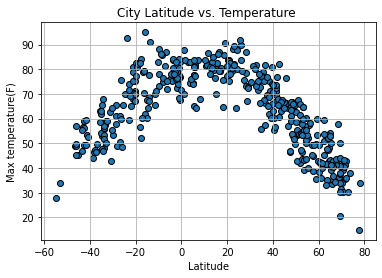

In [18]:
plt.scatter(cityDatadf['Lat'],cityDatadf['Max Temp'],marker='o',edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max temperature(F)')

plt.title('City Latitude vs. Temperature ')

plt.grid(True)

plt.savefig('../output_data/1 Latitude Vs Temperature.png')
plt.show()

## Latitude vs. Humidity Plot

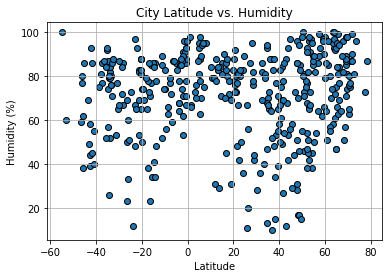

In [20]:
plt.scatter(
    cityDatadf['Lat'], 
    cityDatadf['Humidity'],
    marker="o",  
    edgecolors="black")

plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

plt.savefig('../output_data/2 Latitude Vs Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

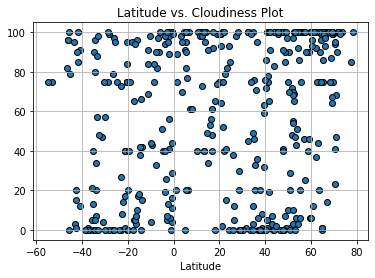

In [21]:
plt.scatter(cityDatadf["Lat"],cityDatadf["Cloudiness"],edgecolor="black")
plt.grid(True)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.savefig('../output_data/3 Latitude Vs Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

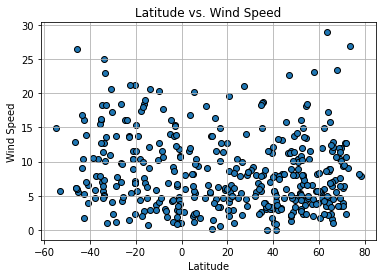

In [22]:
plt.scatter(cityDatadf["Lat"],cityDatadf["Wind Speed"],edgecolors="black")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.savefig("../output_data/4 Latitude vs. Wind Speed Plot.png")

## Linear Regression

In [23]:
from scipy.stats import linregress

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [24]:
#Create Northern and Southern Hemisphere DataFrames for Latitude
northern_df = cityDatadf.loc[cityDatadf["Lat"] >=0]
southern_df = cityDatadf.loc[cityDatadf["Lat"] <0]

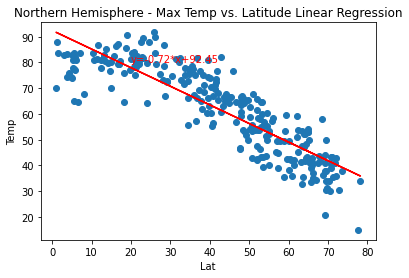

The r-squared is: 0.7600367683818484 which shows Lat and Temperature are correlated


In [25]:
plt.scatter(northern_df["Lat"],northern_df["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(northern_df["Lat"],northern_df["Max Temp"])
regress_val=northern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(northern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(20,80),color="red")
plt.xlabel("Lat")
plt.ylabel("Temp")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Temperature are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Temperature are not correlated')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

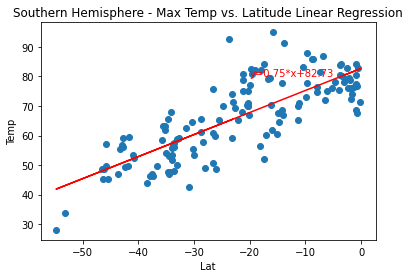

The r-squared is: 0.6380925012030838 which shows Lat and Temperature are correlated


In [26]:
plt.scatter(southern_df["Lat"],southern_df["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(southern_df["Lat"],southern_df["Max Temp"])
regress_val=southern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(southern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(-20,80),color="red")
plt.xlabel("Lat")
plt.ylabel("Temp")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Temperature are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Temperature are not correlated')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

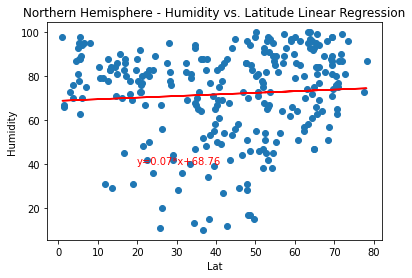

The r-squared is: 0.005069926163741109 which shows Lat and Humidity are not correlated


In [27]:
plt.scatter(northern_df["Lat"],northern_df["Humidity"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(northern_df["Lat"],northern_df["Humidity"])
regress_val=northern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(northern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(20,40),color="red")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Humidity are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Humidity are not correlated')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

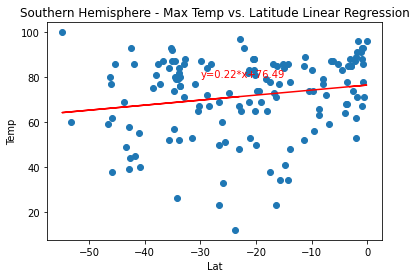

The r-squared is: 0.03250750942597051 which shows Lat and Humidity are not correlated


In [28]:
plt.scatter(southern_df["Lat"],southern_df["Humidity"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(southern_df["Lat"],southern_df["Humidity"])
regress_val=southern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(southern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(-30,80),color="red")
plt.xlabel("Lat")
plt.ylabel("Temp")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Humidity are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Humidity are not correlated')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

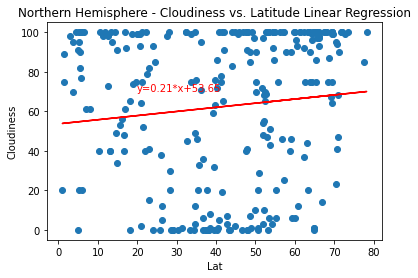

The r-squared is: 0.012498946608962547 which shows Lat and Cloudiness are not correlated


In [29]:
plt.scatter(northern_df["Lat"],northern_df["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(northern_df["Lat"],northern_df["Cloudiness"])
regress_val=northern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(northern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(20,70),color="red")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Cloudiness are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Cloudiness are not correlated')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

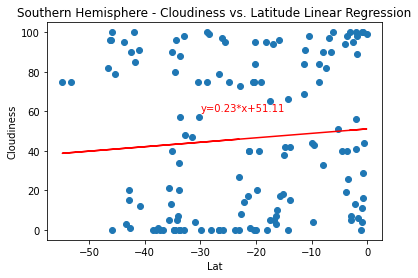

The r-squared is: 0.007040046774283488 which shows Lat and Cloudiness are not correlated


In [30]:
plt.scatter(southern_df["Lat"],southern_df["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(southern_df["Lat"],southern_df["Cloudiness"])
regress_val=southern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(southern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(-30,60),color="red")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Cloudiness are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Cloudiness are not correlated')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

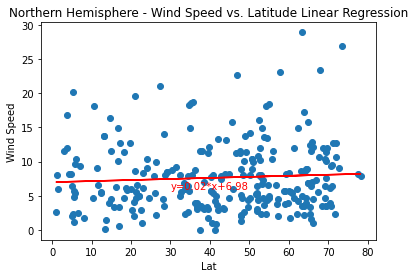

The r-squared is: 0.004007353321836859 which shows Lat and Wind Speed are not correlated


In [31]:
plt.scatter(northern_df["Lat"],northern_df["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(northern_df["Lat"],northern_df["Wind Speed"])
regress_val=northern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(northern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(30,6),color="red")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Wind Speed are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Wind Speed are not correlated')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

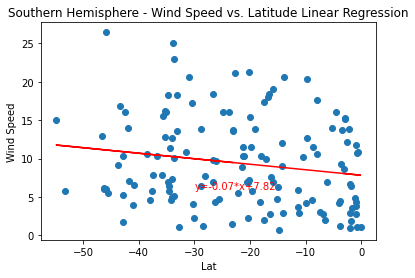

The r-squared is: 0.031044176458849274 which shows Lat and Wind Speed are not correlated


In [32]:
plt.scatter(southern_df["Lat"],southern_df["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr)=linregress(southern_df["Lat"],southern_df["Wind Speed"])
regress_val=southern_df["Lat"]*slope+intercept
eq=f'y={round(slope,2)}*x+{round(intercept,2)}'
plt.plot(southern_df["Lat"],regress_val,"r-")
plt.annotate(eq,(-30,6),color="red")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.show()
if rvalue**2>0.3:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Wind Speed are correlated')
else:
    print(f'The r-squared is: {rvalue**2} which shows Lat and Wind Speed are not correlated')